In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

Using TensorFlow backend.


# Code for Confusion Matrix

In [20]:
def plot_cm(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(constrained_layout=True)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    return ax

# Training for Full

In [19]:
#Load in the data
(x_train_full, y_train_full), (x_test_full, y_test_full) = cifar10.load_data()
print('x_train_full shape:', x_train_full.shape)
print(x_train_full.shape[0], 'train samples')
print(x_test_full.shape[0], 'test samples')

#Convert class vectors to binary class matrices.
y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
y_test_full = keras.utils.to_categorical(y_test_full, num_classes)

#Change type and scale
# x_train_full = x_train_full.astype('float32')
# x_train_full /= 255
# x_test_full = x_test_full.astype('float32')
# x_test_full /= 255

x_train_full shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [8]:
#Define some parameters
batch_size = 256
num_classes = 10
epochs = 100

In [9]:
#Set up the model
full_model = Sequential()
full_model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train_full.shape[1:]))
full_model.add(Activation('relu'))
full_model.add(Conv2D(32, (3, 3)))
full_model.add(Activation('relu'))
full_model.add(MaxPooling2D(pool_size=(2, 2)))
full_model.add(Dropout(0.25))

full_model.add(Conv2D(64, (3, 3), padding='same'))
full_model.add(Activation('relu'))
full_model.add(Conv2D(64, (3, 3)))
full_model.add(Activation('relu'))
full_model.add(MaxPooling2D(pool_size=(2, 2)))
full_model.add(Dropout(0.25))

full_model.add(Flatten())
full_model.add(Dense(512))
full_model.add(Activation('relu'))
full_model.add(Dropout(0.5))
full_model.add(Dense(num_classes))
full_model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
# Let's train the model using RMSprop
full_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

historyFull = full_model.fit(x_train_full, y_train_full, batch_size=batch_size, epochs=epochs, validation_data=(x_test_full, y_test_full), shuffle=True)

#Save the model
full_model.save_weights('./Model/full_model.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


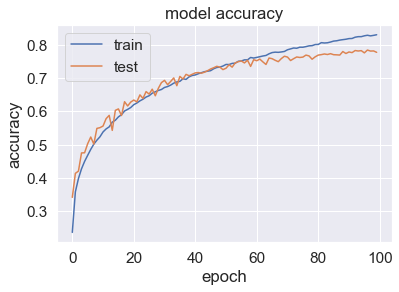

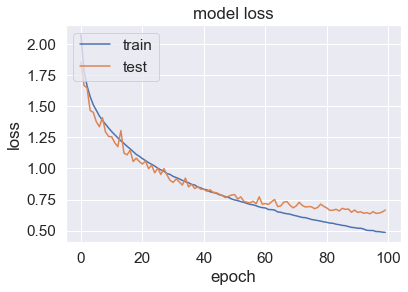

In [127]:
# list all data in history
print(historyFull.history.keys())

# summarize history for accuracy
plt.plot(historyFull.history['accuracy'])
plt.plot(historyFull.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(historyFull.history['loss'])
plt.plot(historyFull.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Normalized confusion matrix
[[0.762 0.014 0.032 0.023 0.034 0.015 0.01  0.016 0.057 0.037]
 [0.008 0.865 0.008 0.006 0.002 0.006 0.013 0.004 0.02  0.068]
 [0.048 0.003 0.587 0.05  0.121 0.089 0.068 0.021 0.008 0.005]
 [0.009 0.003 0.037 0.572 0.072 0.208 0.056 0.029 0.008 0.006]
 [0.008 0.001 0.03  0.034 0.799 0.037 0.037 0.048 0.006 0.   ]
 [0.004 0.002 0.016 0.11  0.05  0.77  0.01  0.033 0.002 0.003]
 [0.002 0.001 0.018 0.049 0.038 0.021 0.862 0.004 0.003 0.002]
 [0.003 0.001 0.009 0.02  0.071 0.054 0.003 0.835 0.002 0.002]
 [0.035 0.021 0.011 0.015 0.01  0.009 0.006 0.005 0.864 0.024]
 [0.015 0.041 0.005 0.02  0.008 0.01  0.004 0.018 0.024 0.855]]


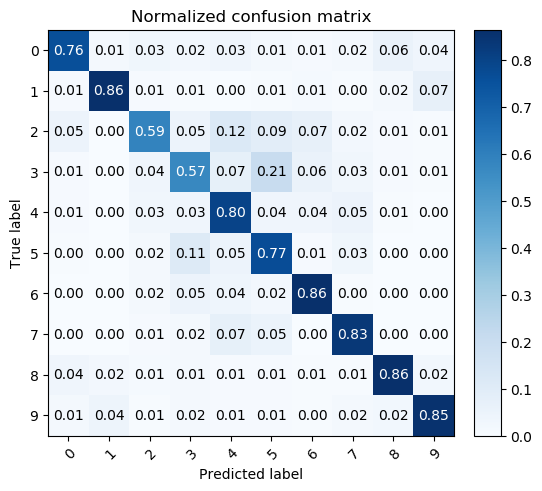

In [20]:
# Plot confusion matrix
y_test_full_argmax = np.argmax(y_test_full, axis=1)
y_pred_full = full_model.predict(x_test_full)
y_pred_full_argmax = np.argmax(y_pred_full, axis=1)

plt.style.use('default')

# Plot normalized confusion matrix
plot_cm(y_test_full_argmax, y_pred_full_argmax, classes=np.array([0,1,2,3,4,5,6,7,8,9]), normalize=True,
                      title='Normalized confusion matrix')

# Training and prediction for undersampling

In [2]:
undersample_path = '/home/ec2-user/SageMaker/efs/Data/UnderSamples/'

In [11]:
x_train_sub = np.load(undersample_path + 'X9Prop0.1.npy')
y_train_sub = np.load(undersample_path + 'Y9Prop0.1.npy')
print('x_train_sub shape:', x_train_sub.shape)
print(x_train_sub.shape[0], 'train samples')
(_, _), (x_test_sub, y_test_sub) = cifar10.load_data()

#Convert class vectors to binary class matrices.
y_train_sub = keras.utils.to_categorical(y_train_sub, num_classes)
y_test_sub = keras.utils.to_categorical(y_test_sub, num_classes)

#Scale
x_train_sub = x_train_sub.astype('float32')
x_train_sub /= 255
x_test_sub = x_test_sub.astype('float32')
x_test_sub /= 255

x_train_sub shape: (45500, 32, 32, 3)
45500 train samples


In [12]:
#Define some parameters
batch_size = 256
num_classes = 10
epochs = 100

In [13]:
#Set up the model
sub_model = Sequential()
sub_model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train_sub.shape[1:]))
sub_model.add(Activation('relu'))
sub_model.add(Conv2D(32, (3, 3)))
sub_model.add(Activation('relu'))
sub_model.add(MaxPooling2D(pool_size=(2, 2)))
sub_model.add(Dropout(0.25))

sub_model.add(Conv2D(64, (3, 3), padding='same'))
sub_model.add(Activation('relu'))
sub_model.add(Conv2D(64, (3, 3)))
sub_model.add(Activation('relu'))
sub_model.add(MaxPooling2D(pool_size=(2, 2)))
sub_model.add(Dropout(0.25))

sub_model.add(Flatten())
sub_model.add(Dense(512))
sub_model.add(Activation('relu'))
sub_model.add(Dropout(0.5))
sub_model.add(Dense(num_classes))
sub_model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

In [69]:
#train the model
sub_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

historySub = sub_model.fit(x_train_sub, y_train_sub, batch_size=batch_size, epochs=epochs, validation_data=(x_test_sub, y_test_sub), shuffle=True)

#Save the model
sub_model.save_weights('./Model/sub_model.h5')

Train on 45500 samples, validate on 10000 samples
Epoch 1/30
45500/45500 [==============================] - 22s 484us/sample - loss: 2.0369 - acc: 0.2375 - val_loss: 2.0303 - val_acc: 0.2996
Epoch 2/30
45500/45500 [==============================] - 7s 160us/sample - loss: 1.7822 - acc: 0.3548 - val_loss: 1.8127 - val_acc: 0.3831
Epoch 3/30
45500/45500 [==============================] - 7s 160us/sample - loss: 1.6541 - acc: 0.4057 - val_loss: 1.7077 - val_acc: 0.4047
Epoch 4/30
45500/45500 [==============================] - 7s 160us/sample - loss: 1.5674 - acc: 0.4351 - val_loss: 1.6282 - val_acc: 0.4356
Epoch 5/30
45500/45500 [==============================] - 7s 160us/sample - loss: 1.4972 - acc: 0.4591 - val_loss: 1.5617 - val_acc: 0.4517
Epoch 6/30
45500/45500 [==============================] - 7s 160us/sample - loss: 1.4450 - acc: 0.4765 - val_loss: 1.5398 - val_acc: 0.4654
Epoch 7/30
45500/45500 [==============================] - 7s 160us/sample - loss: 1.4033 - acc: 0.4952 - val_

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


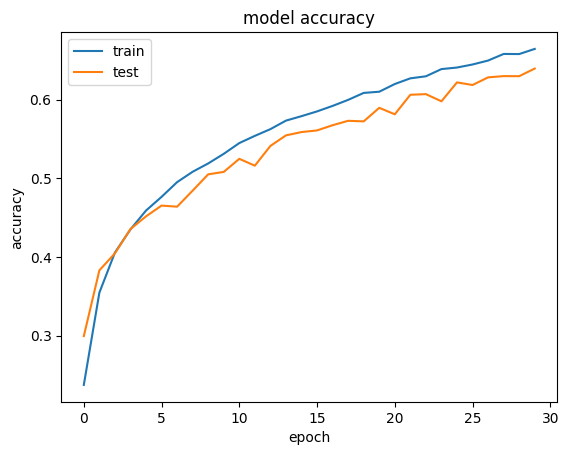

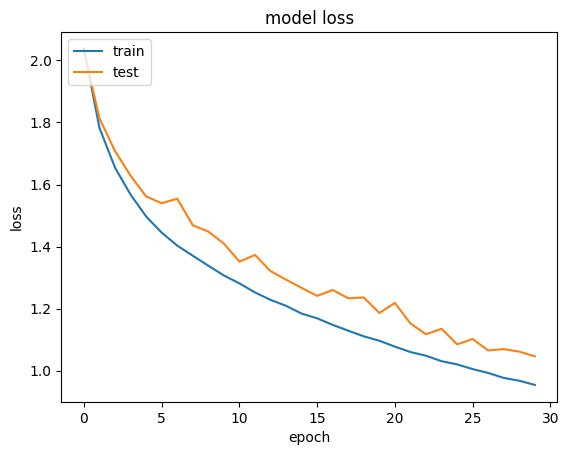

In [71]:
# list all data in history
print(historySub.history.keys())
# summarize history for accuracy
plt.plot(historySub.history['acc'])
plt.plot(historySub.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historySub.history['loss'])
plt.plot(historySub.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Normalized confusion matrix
[[0.811 0.04  0.027 0.014 0.01  0.005 0.009 0.01  0.072 0.002]
 [0.035 0.901 0.008 0.006 0.002 0.001 0.01  0.008 0.027 0.002]
 [0.104 0.013 0.519 0.058 0.114 0.063 0.065 0.044 0.02  0.   ]
 [0.038 0.022 0.084 0.428 0.09  0.163 0.081 0.059 0.034 0.001]
 [0.039 0.008 0.091 0.045 0.606 0.019 0.068 0.102 0.022 0.   ]
 [0.025 0.009 0.08  0.166 0.051 0.545 0.031 0.074 0.019 0.   ]
 [0.013 0.015 0.056 0.043 0.058 0.015 0.779 0.012 0.009 0.   ]
 [0.03  0.005 0.034 0.029 0.056 0.05  0.009 0.783 0.004 0.   ]
 [0.088 0.059 0.013 0.009 0.002 0.003 0.006 0.009 0.809 0.002]
 [0.099 0.464 0.01  0.034 0.008 0.009 0.029 0.058 0.075 0.214]]


<Figure size 1300x1300 with 0 Axes>

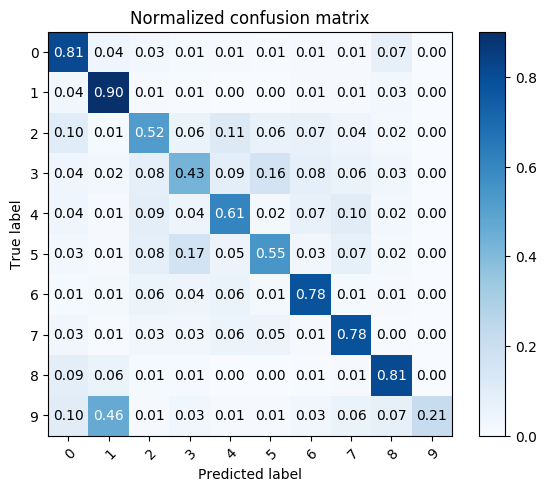

In [72]:
#Plot confusion matrix
y_test_sub_argmax = np.argmax(y_test_sub, axis=1)
y_pred_sub = sub_model.predict(x_test_sub)
y_pred_sub_argmax = np.argmax(y_pred_sub, axis=1)

plt.style.use('default')

plt.figure(figsize = (13,13))
plot_cm(y_test_sub_argmax, y_pred_sub_argmax, classes=np.array([0,1,2,3,4,5,6,7,8,9]), normalize=True,
                      title='Normalized confusion matrix')

# Training and prediction for Oversampling

In [9]:
oversample_path = '/home/ec2-user/SageMaker/efs/Data/OverSamples/'

In [10]:
x_train_oversample = np.load(oversample_path + 'X9Prop0.1OverSample.npy')
y_train_oversample = np.load(oversample_path + 'Y9Prop0.1OverSample.npy')
print('x_oversample shape:', x_train_oversample.shape)
print(x_train_oversample.shape[0], 'train samples')
(_, _), (x_test_oversample, y_test_oversample) = cifar10.load_data()

#Convert class vectors to binary class matrices.
y_train_oversample = keras.utils.to_categorical(y_train_oversample, num_classes)
y_test_oversample = keras.utils.to_categorical(y_test_oversample, num_classes)

#Scale
x_train_oversample = x_train_oversample.astype('float32')
x_train_oversample /= 255
x_test_oversample = x_test_oversample.astype('float32')
x_test_oversample /= 255

x_oversample shape: (50000, 32, 32, 3)
50000 train samples


In [15]:
#Define some parameters
batch_size = 256
num_classes = 10
epochs = 100

In [16]:
#Set up the model
oversample_model = Sequential()
oversample_model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train_oversample.shape[1:]))
oversample_model.add(Activation('relu'))
oversample_model.add(Conv2D(32, (3, 3)))
oversample_model.add(Activation('relu'))
oversample_model.add(MaxPooling2D(pool_size=(2, 2)))
oversample_model.add(Dropout(0.25))

oversample_model.add(Conv2D(64, (3, 3), padding='same'))
oversample_model.add(Activation('relu'))
oversample_model.add(Conv2D(64, (3, 3)))
oversample_model.add(Activation('relu'))
oversample_model.add(MaxPooling2D(pool_size=(2, 2)))
oversample_model.add(Dropout(0.25))

oversample_model.add(Flatten())
oversample_model.add(Dense(512))
oversample_model.add(Activation('relu'))
oversample_model.add(Dropout(0.5))
oversample_model.add(Dense(num_classes))
oversample_model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

In [17]:
oversample_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

historyOversample = oversample_model.fit(x_train_oversample, y_train_oversample, batch_size=batch_size, epochs=epochs, validation_data=(x_test_oversample, y_test_oversample), shuffle=True)

#Save the model
oversample_model.save_weights('./Model/oversample_model.h5')

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 170us/sample - loss: 2.0702 - acc: 0.2398 - val_loss: 1.9067 - val_acc: 0.3250
Epoch 2/100
50000/50000 [==============================] - 8s 156us/sample - loss: 1.7832 - acc: 0.3594 - val_loss: 1.6620 - val_acc: 0.4104
Epoch 3/100
50000/50000 [==============================] - 8s 156us/sample - loss: 1.6615 - acc: 0.4049 - val_loss: 1.7767 - val_acc: 0.3696
Epoch 4/100
50000/50000 [==============================] - 8s 157us/sample - loss: 1.5784 - acc: 0.4326 - val_loss: 1.5231 - val_acc: 0.4573
Epoch 5/100
50000/50000 [==============================] - 8s 156us/sample - loss: 1.5179 - acc: 0.4524 - val_loss: 1.4366 - val_acc: 0.4796
Epoch 6/100
50000/50000 [==============================] - 8s 156us/sample - loss: 1.4655 - acc: 0.4731 - val_loss: 1.4016 - val_acc: 0.4952
Epoch 7/100
50000/50000 [==============================] - 8s 157us/sample - loss: 1.4268 - acc: 0.4891 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


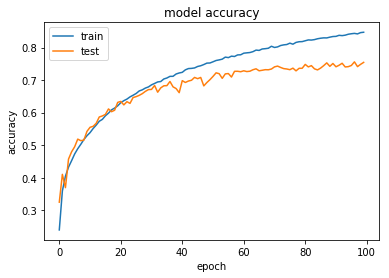

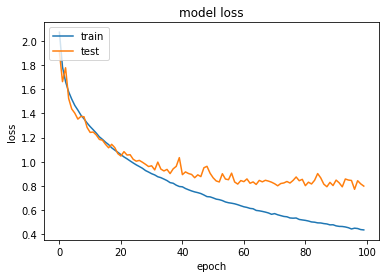

In [19]:
# list all data in history
print(historyOversample.history.keys())
# summarize history for accuracy
plt.plot(historyOversample.history['acc'])
plt.plot(historyOversample.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyOversample.history['loss'])
plt.plot(historyOversample.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Normalized confusion matrix
[[0.83 0.02 0.01 0.01 0.02 0.   0.01 0.01 0.06 0.01]
 [0.01 0.92 0.   0.01 0.   0.   0.01 0.   0.02 0.02]
 [0.07 0.01 0.59 0.06 0.1  0.06 0.06 0.04 0.01 0.  ]
 [0.02 0.01 0.04 0.57 0.07 0.15 0.06 0.05 0.02 0.  ]
 [0.01 0.   0.04 0.05 0.75 0.03 0.03 0.07 0.01 0.  ]
 [0.02 0.   0.03 0.14 0.06 0.67 0.02 0.05 0.01 0.  ]
 [0.01 0.01 0.02 0.05 0.03 0.02 0.86 0.   0.01 0.  ]
 [0.01 0.   0.01 0.02 0.04 0.04 0.01 0.85 0.   0.  ]
 [0.05 0.04 0.01 0.01 0.01 0.01 0.   0.01 0.87 0.01]
 [0.05 0.19 0.01 0.03 0.01 0.01 0.01 0.03 0.05 0.62]]


<Figure size 1300x1300 with 0 Axes>

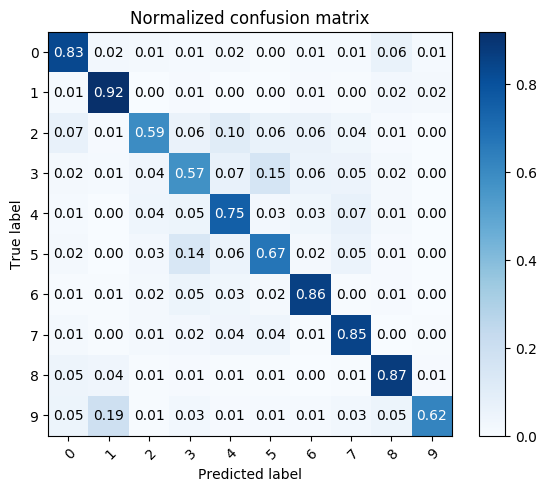

In [28]:
#Plot confusion matrix
y_test_oversample_argmax = np.argmax(y_test_oversample, axis=1)
y_pred_oversample = oversample_model.predict(x_test_oversample)
y_pred_oversample_argmax = np.argmax(y_pred_oversample, axis=1)

plt.style.use('default')

plt.figure(figsize = (13,13))
plot_cm(y_test_oversample_argmax, y_pred_oversample_argmax, classes=np.array([0,1,2,3,4,5,6,7,8,9]), normalize=True,
                      title='Normalized confusion matrix')

# Training and prediction for Vanilla SMOTE

In [33]:
SMOTE_path = './Data/SMOTE/'

In [34]:
x_train_SMOTE = np.load(SMOTE_path + 'X9Prop0.1SMOTE.npy')
y_train_SMOTE = np.load(SMOTE_path + 'Y9Prop0.1SMOTE.npy')
print('x_train_SMOTE shape:', x_train_SMOTE.shape)
print(x_train_SMOTE.shape[0], 'train samples')
(_, _), (x_test_SMOTE, y_test_SMOTE) = cifar10.load_data()

#Convert class vectors to binary class matrices.
y_train_SMOTE = keras.utils.to_categorical(y_train_SMOTE, num_classes)
y_test_SMOTE = keras.utils.to_categorical(y_test_SMOTE, num_classes)

#Scale
x_train_SMOTE = x_train_SMOTE.astype('float32')
x_train_SMOTE /= 255
x_test_SMOTE = x_test_SMOTE.astype('float32')
x_test_SMOTE /= 255

x_train_SMOTE shape: (50000, 32, 32, 3)
50000 train samples


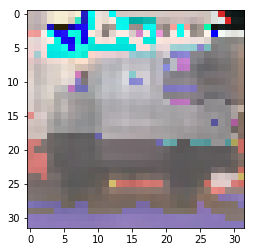

In [40]:
plt.imshow(x_train_SMOTE[49002], cmap=plt.get_cmap('gray'))

In [41]:
#Define some parameters
batch_size = 256
num_classes = 10
epochs = 100

In [42]:
#Set up the model
SMOTE_model = Sequential()
SMOTE_model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train_oversample.shape[1:]))
SMOTE_model.add(Activation('relu'))
SMOTE_model.add(Conv2D(32, (3, 3)))
SMOTE_model.add(Activation('relu'))
SMOTE_model.add(MaxPooling2D(pool_size=(2, 2)))
SMOTE_model.add(Dropout(0.25))

SMOTE_model.add(Conv2D(64, (3, 3), padding='same'))
SMOTE_model.add(Activation('relu'))
SMOTE_model.add(Conv2D(64, (3, 3)))
SMOTE_model.add(Activation('relu'))
SMOTE_model.add(MaxPooling2D(pool_size=(2, 2)))
SMOTE_model.add(Dropout(0.25))

SMOTE_model.add(Flatten())
SMOTE_model.add(Dense(512))
SMOTE_model.add(Activation('relu'))
SMOTE_model.add(Dropout(0.5))
SMOTE_model.add(Dense(num_classes))
SMOTE_model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

In [43]:
SMOTE_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

historySmote = SMOTE_model.fit(x_train_SMOTE, y_train_SMOTE, batch_size=batch_size, epochs=epochs, validation_data=(x_test_SMOTE, y_test_SMOTE), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 173us/sample - loss: 1.9328 - acc: 0.2907 - val_loss: 1.8102 - val_acc: 0.3637
Epoch 2/100
50000/50000 [==============================] - 8s 155us/sample - loss: 1.6602 - acc: 0.4014 - val_loss: 1.6677 - val_acc: 0.4013
Epoch 3/100
50000/50000 [==============================] - 8s 156us/sample - loss: 1.5559 - acc: 0.4390 - val_loss: 1.6872 - val_acc: 0.4089
Epoch 4/100
50000/50000 [==============================] - 8s 156us/sample - loss: 1.4795 - acc: 0.4660 - val_loss: 1.5525 - val_acc: 0.4447
Epoch 5/100
50000/50000 [==============================] - 8s 156us/sample - loss: 1.4169 - acc: 0.4883 - val_loss: 1.4617 - val_acc: 0.4814
Epoch 6/100
50000/50000 [==============================] - 8s 156us/sample - loss: 1.3635 - acc: 0.5093 - val_loss: 1.4655 - val_acc: 0.4789
Epoch 7/100
50000/50000 [==============================] - 8s 155us/sample - loss: 1.3204 - acc: 0.5256 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


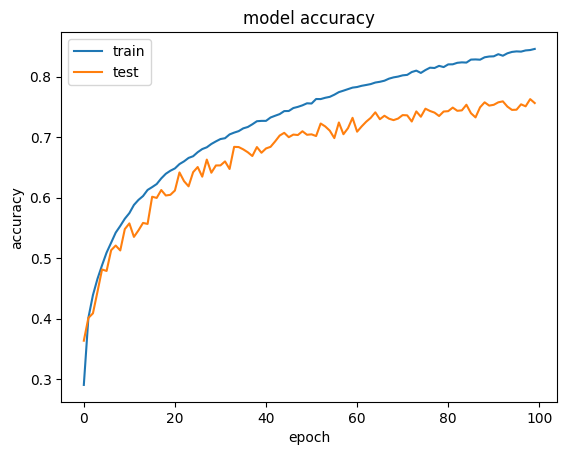

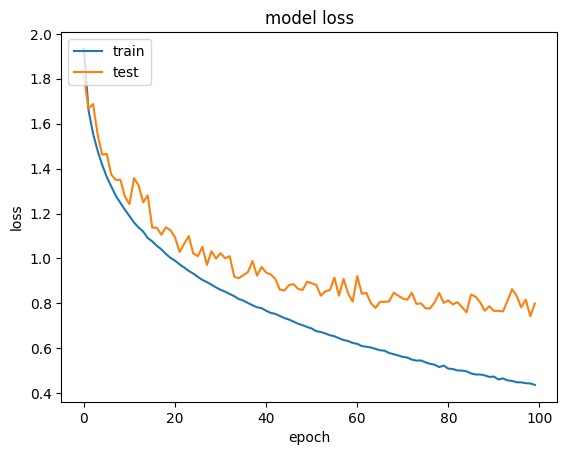

In [44]:
# list all data in history
print(historySmote.history.keys())
# summarize history for accuracy
plt.plot(historySmote.history['acc'])
plt.plot(historySmote.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historySmote.history['loss'])
plt.plot(historySmote.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Normalized confusion matrix
[[0.83 0.02 0.04 0.01 0.02 0.   0.01 0.01 0.05 0.01]
 [0.02 0.92 0.01 0.01 0.   0.   0.01 0.   0.02 0.01]
 [0.06 0.01 0.67 0.04 0.07 0.06 0.07 0.02 0.01 0.  ]
 [0.02 0.01 0.06 0.6  0.06 0.15 0.06 0.02 0.01 0.  ]
 [0.02 0.   0.06 0.04 0.75 0.03 0.04 0.05 0.01 0.  ]
 [0.01 0.   0.04 0.13 0.04 0.71 0.03 0.04 0.   0.  ]
 [0.01 0.   0.03 0.04 0.02 0.02 0.88 0.   0.   0.  ]
 [0.01 0.   0.03 0.02 0.05 0.05 0.01 0.83 0.   0.  ]
 [0.05 0.03 0.01 0.01 0.01 0.   0.01 0.   0.87 0.  ]
 [0.07 0.25 0.02 0.03 0.01 0.01 0.02 0.03 0.06 0.51]]


<Figure size 1300x1300 with 0 Axes>

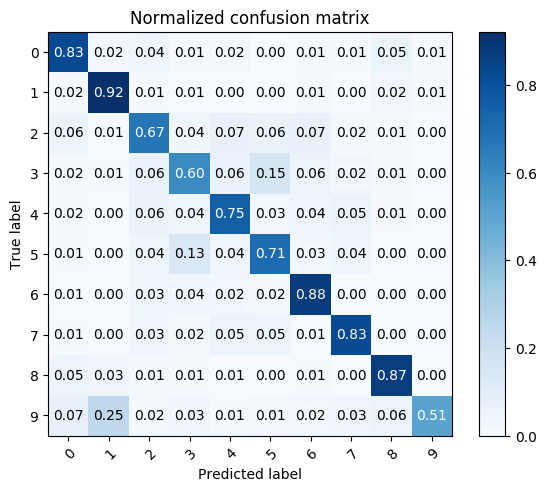

In [46]:
#Plot confusion matrix
y_test_SMOTE_argmax = np.argmax(y_test_SMOTE, axis=1)
y_pred_SMOTE = SMOTE_model.predict(x_test_SMOTE)
y_pred_SMOTE_argmax = np.argmax(y_pred_SMOTE, axis=1)

plt.style.use('default')

plt.figure(figsize = (13,13))
plot_cm(y_test_SMOTE_argmax, y_pred_SMOTE_argmax, classes=np.array([0,1,2,3,4,5,6,7,8,9]), normalize=True,
                      title='Normalized confusion matrix')

# Training and prediction for ADASyn

In [41]:
ADASYN_path = './Data/ADASYN/'

In [42]:
x_train_ADASYN = np.load(ADASYN_path + 'X9Prop0.1ADASYN.npy')
x_train_ADASYN = x_train_ADASYN.reshape(tuple([x_train_ADASYN.shape[0]] + [32,32,3]))
y_train_ADASYN = np.load(ADASYN_path + 'Y9Prop0.1ADASYN.npy')
print('x_train_ADASYN shape:', x_train_ADASYN.shape)
print(x_train_ADASYN.shape[0], 'train samples')
(_, _), (x_test_ADASYN, y_test_ADASYN) = cifar10.load_data()

#Convert class vectors to binary class matrices.
y_train_ADASYN = keras.utils.to_categorical(y_train_ADASYN, num_classes)
y_test_ADASYN = keras.utils.to_categorical(y_test_ADASYN, num_classes)

#Scale
x_train_ADASYN = x_train_ADASYN.astype('float32')
x_train_ADASYN /= 255

x_test_ADASYN = x_test_ADASYN.astype('float32')
x_test_ADASYN /= 255

x_train_ADASYN shape: (49890, 32, 32, 3)
49890 train samples


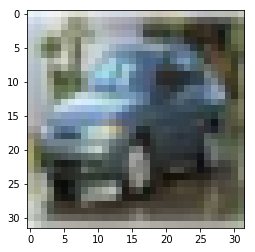

In [48]:
plt.imshow(x_train_ADASYN[6002], cmap=plt.get_cmap('gray'))

In [58]:
#Define some parameters
batch_size = 256
num_classes = 10
epochs = 100

In [59]:
#Set up the model
ADASYN_model = Sequential()
ADASYN_model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train_oversample.shape[1:]))
ADASYN_model.add(Activation('relu'))
ADASYN_model.add(Conv2D(32, (3, 3)))
ADASYN_model.add(Activation('relu'))
ADASYN_model.add(MaxPooling2D(pool_size=(2, 2)))
ADASYN_model.add(Dropout(0.25))

ADASYN_model.add(Conv2D(64, (3, 3), padding='same'))
ADASYN_model.add(Activation('relu'))
ADASYN_model.add(Conv2D(64, (3, 3)))
ADASYN_model.add(Activation('relu'))
ADASYN_model.add(MaxPooling2D(pool_size=(2, 2)))
ADASYN_model.add(Dropout(0.25))

ADASYN_model.add(Flatten())
ADASYN_model.add(Dense(512))
ADASYN_model.add(Activation('relu'))
ADASYN_model.add(Dropout(0.5))
ADASYN_model.add(Dense(num_classes))
ADASYN_model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

In [60]:
ADASYN_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

historyADASYN = ADASYN_model.fit(x_train_ADASYN, y_train_ADASYN, batch_size=batch_size, epochs=epochs, validation_data=(x_test_ADASYN, y_test_ADASYN), shuffle=True)

Train on 49890 samples, validate on 10000 samples
Epoch 1/100
49890/49890 [==============================] - 9s 179us/sample - loss: 1.9547 - acc: 0.2828 - val_loss: 1.8240 - val_acc: 0.3585
Epoch 2/100
49890/49890 [==============================] - 8s 157us/sample - loss: 1.6717 - acc: 0.3966 - val_loss: 1.7076 - val_acc: 0.3911
Epoch 3/100
49890/49890 [==============================] - 8s 157us/sample - loss: 1.5611 - acc: 0.4372 - val_loss: 1.6330 - val_acc: 0.4228
Epoch 4/100
49890/49890 [==============================] - 8s 156us/sample - loss: 1.4746 - acc: 0.4676 - val_loss: 1.5090 - val_acc: 0.4574
Epoch 5/100
49890/49890 [==============================] - 8s 157us/sample - loss: 1.4115 - acc: 0.4903 - val_loss: 1.4804 - val_acc: 0.4643
Epoch 6/100
49890/49890 [==============================] - 8s 157us/sample - loss: 1.3610 - acc: 0.5115 - val_loss: 1.4137 - val_acc: 0.5008
Epoch 7/100
49890/49890 [==============================] - 8s 157us/sample - loss: 1.3174 - acc: 0.5269 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


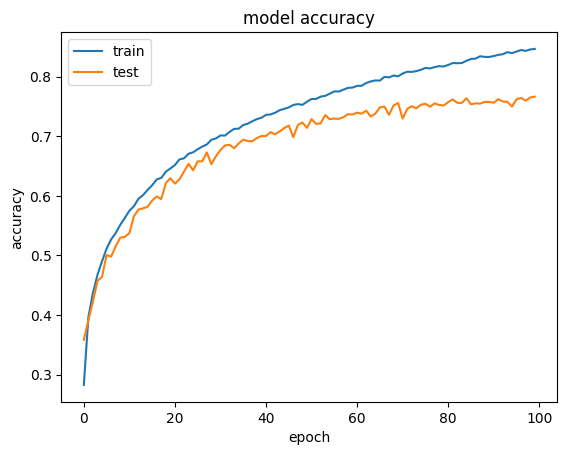

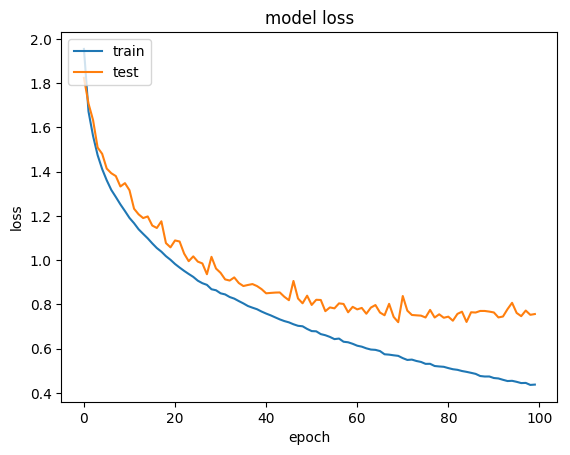

In [62]:
# list all data in history
print(historyADASYN.history.keys())
# summarize history for accuracy
plt.plot(historyADASYN.history['acc'])
plt.plot(historyADASYN.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyADASYN.history['loss'])
plt.plot(historyADASYN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Normalized confusion matrix
[[0.82 0.03 0.03 0.02 0.02 0.01 0.01 0.01 0.05 0.01]
 [0.01 0.93 0.01 0.01 0.   0.   0.01 0.   0.02 0.01]
 [0.05 0.01 0.65 0.04 0.09 0.06 0.07 0.02 0.01 0.  ]
 [0.02 0.01 0.04 0.59 0.06 0.15 0.07 0.04 0.01 0.01]
 [0.01 0.   0.04 0.04 0.8  0.02 0.05 0.04 0.01 0.  ]
 [0.01 0.   0.03 0.15 0.05 0.7  0.03 0.03 0.01 0.  ]
 [0.   0.   0.01 0.04 0.02 0.01 0.91 0.   0.   0.  ]
 [0.01 0.   0.02 0.02 0.05 0.05 0.01 0.83 0.   0.  ]
 [0.04 0.05 0.01 0.01 0.01 0.01 0.   0.   0.87 0.01]
 [0.05 0.23 0.01 0.04 0.01 0.01 0.01 0.03 0.04 0.56]]


<Figure size 1300x1300 with 0 Axes>

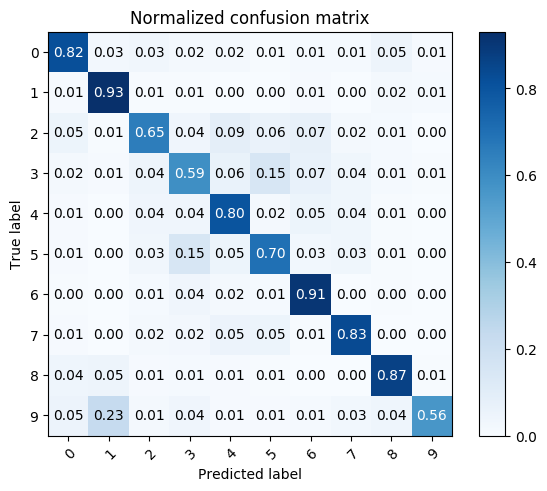

In [63]:
#Plot confusion matrix
y_test_ADASYN_argmax = np.argmax(y_test_ADASYN, axis=1)
y_pred_ADASYN = ADASYN_model.predict(x_test_ADASYN)
y_pred_ADASYN_argmax = np.argmax(y_pred_ADASYN, axis=1)

plt.style.use('default')

plt.figure(figsize = (13,13))
plot_cm(y_test_ADASYN_argmax, y_pred_ADASYN_argmax, classes=np.array([0,1,2,3,4,5,6,7,8,9]), normalize=True,
                      title='Normalized confusion matrix')

# Training and Predicting for GAN

In [76]:
from tensorflow.keras.layers import LeakyReLU, Reshape, Conv2DTranspose

# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 4x4 image
	n_nodes = 256 * 4 * 4
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((4, 4, 256)))
	# upsample to 8x8
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 16x16
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 32x32
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# output layer
	model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
	return model

In [83]:
def get_fake_objects(batch_size, G_input_n):
        z_noise = draw_G_random_input_noise(batch_size, G_input_n)
        G_of_z_fake_objects = gan_generator.predict(z_noise)
        return z_noise, G_of_z_fake_objects

def draw_G_random_input_noise(num_samples, G_input_n):
        random_noise = np.random.uniform(-1.0, 1.0, size=[num_samples, G_input_n])
        # print("random_noise=", random_noise)
        return random_noise

In [84]:
G_input_n = 100
batch_size = 20
path_to_generator = './generator_model_3000.h5'

In [85]:
gan_generator = define_generator(latent_dim = G_input_n)
gan_generator.load_weights(path_to_generator)

In [11]:
import numpy as np

generated_images = np.load('/home/ec2-user/SageMaker/efs/latest/save_me_array_fake_10x.png.npy')
generated_images.shape

(4500, 32, 32, 3)

In [12]:
x_train_GAN = np.load(undersample_path + 'X9Prop0.1.npy')
# _, generated_images = get_fake_objects(4500, 100)
generated_images = generated_images[0:4500]
x_train_GAN = np.concatenate((x_train_GAN, generated_images))
y_train_GAN = np.load(undersample_path + 'Y9Prop0.1.npy')
y_train_GAN = np.concatenate((y_train_GAN, np.array([9]*4500).reshape(-1,1)))
print('x_train_GAN shape:', x_train_GAN.shape)
print(x_train_GAN.shape[0], 'train samples')
(_, _), (x_test_GAN, y_test_GAN) = cifar10.load_data()

#Convert class vectors to binary class matrices.
num_classes = 10
y_train_GAN = keras.utils.to_categorical(y_train_GAN, num_classes)
y_test_GAN = keras.utils.to_categorical(y_test_GAN, num_classes)

#Scale
x_train_GAN = x_train_GAN.astype('float32')
x_train_GAN /= 255
x_test_GAN = x_test_GAN.astype('float32')
x_test_GAN /= 255

x_train_GAN shape: (50000, 32, 32, 3)
50000 train samples


In [13]:
#Define some parameters
batch_size = 256
num_classes = 10
epochs = 100

In [14]:
#Set up the model
GAN_model = Sequential()
GAN_model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train_oversample.shape[1:]))
GAN_model.add(Activation('relu'))
GAN_model.add(Conv2D(32, (3, 3)))
GAN_model.add(Activation('relu'))
GAN_model.add(MaxPooling2D(pool_size=(2, 2)))
GAN_model.add(Dropout(0.25))

GAN_model.add(Conv2D(64, (3, 3), padding='same'))
GAN_model.add(Activation('relu'))
GAN_model.add(Conv2D(64, (3, 3)))
GAN_model.add(Activation('relu'))
GAN_model.add(MaxPooling2D(pool_size=(2, 2)))
GAN_model.add(Dropout(0.25))

GAN_model.add(Flatten())
GAN_model.add(Dense(512))
GAN_model.add(Activation('relu'))
GAN_model.add(Dropout(0.5))
GAN_model.add(Dense(num_classes))
GAN_model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
GAN_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

historyGAN = GAN_model.fit(x_train_GAN, y_train_GAN, batch_size=batch_size, epochs=epochs, validation_data=(x_test_GAN, y_test_GAN), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 192us/sample - loss: 1.9422 - acc: 0.3122 - val_loss: 1.9948 - val_acc: 0.3009
Epoch 2/100
50000/50000 [==============================] - 8s 159us/sample - loss: 1.5999 - acc: 0.4232 - val_loss: 1.8968 - val_acc: 0.3543
Epoch 3/100
50000/50000 [==============================] - 8s 159us/sample - loss: 1.4845 - acc: 0.4704 - val_loss: 1.7209 - val_acc: 0.4116
Epoch 4/100
50000/50000 [==============================] - 8s 159us/sample - loss: 1.3997 - acc: 0.4974 - val_loss: 1.6036 - val_acc: 0.4462
Epoch 5/100
50000/50000 [==============================] - 8s 159us/sample - loss: 1.3373 - acc: 0.5182 - val_loss: 1.6071 - val_acc: 0.4475
Epoch 6/100
50000/50000 [==============================] - 8s 159us/sample - loss: 1.2947 - acc: 0.5352 - val_loss: 1.5241 - val_acc: 0.4821
Epoch 7/100
50000/50000 [==============================] - 8s 160us/sample - loss: 1.2577 - acc: 0.5504

50000/50000 [==============================] - 8s 159us/sample - loss: 0.6042 - acc: 0.7881 - val_loss: 0.8130 - val_acc: 0.7270
Epoch 59/100
50000/50000 [==============================] - 8s 159us/sample - loss: 0.6014 - acc: 0.7890 - val_loss: 0.8157 - val_acc: 0.7249
Epoch 60/100
50000/50000 [==============================] - 8s 159us/sample - loss: 0.5899 - acc: 0.7949 - val_loss: 0.8061 - val_acc: 0.7293
Epoch 61/100
50000/50000 [==============================] - 8s 159us/sample - loss: 0.5898 - acc: 0.7948 - val_loss: 0.8120 - val_acc: 0.7301
Epoch 62/100
50000/50000 [==============================] - 8s 160us/sample - loss: 0.5816 - acc: 0.7947 - val_loss: 0.8100 - val_acc: 0.7247
Epoch 63/100
50000/50000 [==============================] - 8s 159us/sample - loss: 0.5778 - acc: 0.7974 - val_loss: 0.8772 - val_acc: 0.7132
Epoch 64/100
50000/50000 [==============================] - 8s 160us/sample - loss: 0.5711 - acc: 0.7993 - val_loss: 0.8316 - val_acc: 0.7220
Epoch 65/100
50000/

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


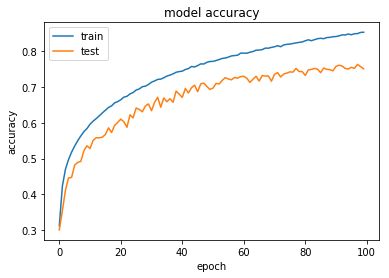

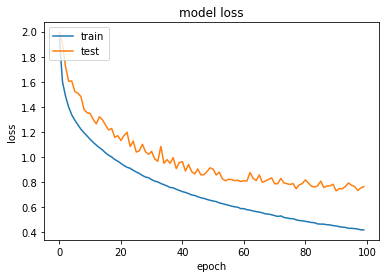

In [17]:
# list all data in history
print(historyGAN.history.keys())
# summarize history for accuracy
plt.plot(historyGAN.history['acc'])
plt.plot(historyGAN.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyGAN.history['loss'])
plt.plot(historyGAN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Normalized confusion matrix
[[0.847 0.017 0.016 0.014 0.007 0.007 0.004 0.016 0.061 0.011]
 [0.016 0.919 0.003 0.003 0.002 0.005 0.003 0.004 0.032 0.013]
 [0.068 0.009 0.592 0.056 0.087 0.08  0.039 0.047 0.019 0.003]
 [0.027 0.007 0.033 0.559 0.059 0.207 0.03  0.059 0.017 0.002]
 [0.022 0.005 0.038 0.051 0.719 0.03  0.019 0.098 0.018 0.   ]
 [0.01  0.003 0.015 0.108 0.029 0.75  0.01  0.064 0.011 0.   ]
 [0.007 0.007 0.024 0.049 0.04  0.046 0.802 0.015 0.009 0.001]
 [0.014 0.002 0.008 0.015 0.022 0.047 0.003 0.885 0.004 0.   ]
 [0.044 0.022 0.006 0.011 0.001 0.004 0.003 0.004 0.903 0.002]
 [0.076 0.225 0.005 0.014 0.007 0.013 0.008 0.049 0.068 0.535]]


<Figure size 1300x1300 with 0 Axes>

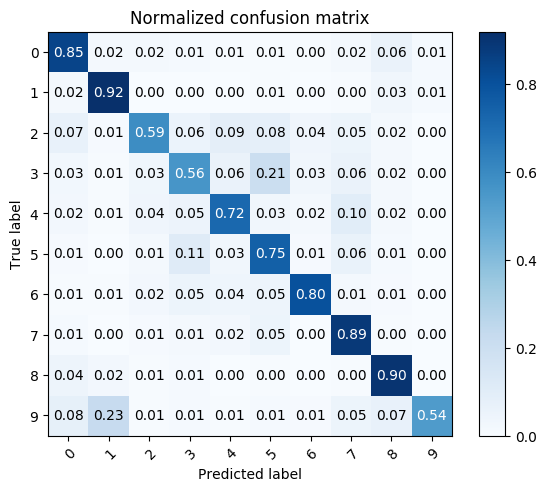

In [21]:
#Plot confusion matrix
y_test_GAN_argmax = np.argmax(y_test_GAN, axis=1)
y_pred_GAN = GAN_model.predict(x_test_GAN)
y_pred_GAN_argmax = np.argmax(y_pred_GAN, axis=1)

plt.style.use('default')

plt.figure(figsize = (13,13))
plot_cm(y_test_GAN_argmax, y_pred_GAN_argmax, classes=np.array([0,1,2,3,4,5,6,7,8,9]), normalize=True,
                      title='Normalized confusion matrix')

# Boosting method only

In [43]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize

In [14]:
#Define some parameters for training
batch_size = 256
num_classes = 10
epochs = 30
num_iterators = 50

In [45]:
#Load in the data (If you want undersampled dataset)
(_, _), (x_test_boost, y_test_boost) = cifar10.load_data()

undersample_path = '../sampling/undersample/'
x_train_boost = np.load(undersample_path + 'X9Prop0.1.npy')
x_train_boost = x_train_boost.astype('float32')
x_train_boost /= 255
x_test_boost = x_test_boost.astype('float32')
x_test_boost /= 255

y_train_boost = np.load(undersample_path + 'Y9Prop0.1.npy')
y_train_boost = keras.utils.to_categorical(y_train_boost, num_classes)
y_test_boost = keras.utils.to_categorical(y_test_boost, num_classes)

In [46]:
#Set up the model function
def model_func():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=x_train_boost.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    # initiate RMSprop optimizer
    opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
    
    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
    return model

In [55]:
# model_store = []
# history_store = []
# alpha_store = []
# weight_store = [np.array(x_train_boost.shape[0]*[1/x_train_boost.shape[0]])] #Initialize as 1/n for all

for i in [41,42,43,44,45,46,47,48,49]:
    #Create current model, train it, store it and it's history.
    curr_model = model_func()
    curr_history = curr_model.fit(x_train_boost, y_train_boost, batch_size=batch_size, epochs=epochs, sample_weight=weight_store[i], validation_data=(x_test_boost, y_test_boost), shuffle=True)
    model_store.append(curr_model)
    history_store.append(curr_history)
    
    #Recalculate the weights, update weights
    prediction = curr_model.predict(x_train_boost) #predict
    predict_matrix = (prediction == prediction.max(axis=1)[:,None]).astype(int) #Convert to 1-0 matrix
    match_matrix = y_train_boost - predict_matrix #Difference to eventually generate match_vector
    match_vector = np.sum(np.abs(match_matrix), axis = 1)/2 #1 indicates no match
    error = np.sum(weight_store[i] * match_vector)/np.sum(weight_store[i]) #Calculate error
    alpha = np.log((1-error)/error) + np.log(num_classes-1) #Calulate alpha
    alpha_store.append(alpha) #Append
    new_weight = weight_store[i] * np.exp(alpha * match_vector) #Calculate new weights
    new_weight /= np.sum(new_weight) #Normalize
    weight_store.append(new_weight) #Append
    
    if i%10==0 or i==num_iterators-1:
        np.save('./PureBoostData/Weights/new_weight' + str(i) + '.npy', new_weight)
        np.save('./PureBoostData/Alpha/alpha' + str(i) + '.npy', alpha_store)
        curr_model.save_weights('./PureBoostData/Model/model' + str(i) + '.h5')

Train on 45500 samples, validate on 10000 samples
Epoch 1/30
45500/45500 [==============================] - 21s 468us/sample - loss: 5.0567e-05 - acc: 0.1049 - val_loss: 2.3076 - val_acc: 0.0992
Epoch 2/30
45500/45500 [==============================] - 8s 168us/sample - loss: 5.0378e-05 - acc: 0.1089 - val_loss: 2.3089 - val_acc: 0.1017
Epoch 3/30
45500/45500 [==============================] - 8s 168us/sample - loss: 5.0357e-05 - acc: 0.1124 - val_loss: 2.3115 - val_acc: 0.0998
Epoch 4/30
45500/45500 [==============================] - 8s 168us/sample - loss: 5.0320e-05 - acc: 0.1093 - val_loss: 2.3101 - val_acc: 0.1078
Epoch 5/30
45500/45500 [==============================] - 8s 168us/sample - loss: 5.0307e-05 - acc: 0.1113 - val_loss: 2.3129 - val_acc: 0.1027
Epoch 6/30
45500/45500 [==============================] - 8s 168us/sample - loss: 5.0324e-05 - acc: 0.1133 - val_loss: 2.3088 - val_acc: 0.1077
Epoch 7/30
45500/45500 [==============================] - 8s 168us/sample - loss: 5.0

Epoch 27/30
45500/45500 [==============================] - 8s 165us/sample - loss: 5.0031e-05 - acc: 0.1178 - val_loss: 2.2914 - val_acc: 0.1209
Epoch 28/30
45500/45500 [==============================] - 8s 168us/sample - loss: 4.9919e-05 - acc: 0.1258 - val_loss: 2.2896 - val_acc: 0.1385
Epoch 29/30
45500/45500 [==============================] - 8s 167us/sample - loss: 4.9900e-05 - acc: 0.1316 - val_loss: 2.2848 - val_acc: 0.1227
Epoch 30/30
45500/45500 [==============================] - 8s 165us/sample - loss: 4.9899e-05 - acc: 0.1353 - val_loss: 2.2804 - val_acc: 0.1474
Train on 45500 samples, validate on 10000 samples
Epoch 1/30
45500/45500 [==============================] - 22s 476us/sample - loss: 5.0570e-05 - acc: 0.1086 - val_loss: 2.3058 - val_acc: 0.0936
Epoch 2/30
45500/45500 [==============================] - 8s 167us/sample - loss: 5.0486e-05 - acc: 0.1112 - val_loss: 2.3061 - val_acc: 0.1083
Epoch 3/30
45500/45500 [==============================] - 8s 167us/sample - loss:

Epoch 23/30
45500/45500 [==============================] - 7s 165us/sample - loss: 5.0391e-05 - acc: 0.1193 - val_loss: 2.3048 - val_acc: 0.1011
Epoch 24/30
45500/45500 [==============================] - 7s 165us/sample - loss: 5.0370e-05 - acc: 0.1181 - val_loss: 2.3052 - val_acc: 0.1004
Epoch 25/30
45500/45500 [==============================] - 7s 165us/sample - loss: 5.0377e-05 - acc: 0.1172 - val_loss: 2.3031 - val_acc: 0.1032
Epoch 26/30
45500/45500 [==============================] - 7s 165us/sample - loss: 5.0371e-05 - acc: 0.1223 - val_loss: 2.2984 - val_acc: 0.1017
Epoch 27/30
45500/45500 [==============================] - 7s 165us/sample - loss: 5.0371e-05 - acc: 0.1236 - val_loss: 2.2969 - val_acc: 0.1021
Epoch 28/30
45500/45500 [==============================] - 8s 165us/sample - loss: 5.0319e-05 - acc: 0.1197 - val_loss: 2.2983 - val_acc: 0.1046
Epoch 29/30
45500/45500 [==============================] - 8s 165us/sample - loss: 5.0359e-05 - acc: 0.1235 - val_loss: 2.2947 - v

Epoch 19/30
45500/45500 [==============================] - 8s 170us/sample - loss: 5.0377e-05 - acc: 0.1248 - val_loss: 2.2988 - val_acc: 0.1308
Epoch 20/30
45500/45500 [==============================] - 8s 170us/sample - loss: 5.0359e-05 - acc: 0.1291 - val_loss: 2.2967 - val_acc: 0.1184
Epoch 21/30
45500/45500 [==============================] - 8s 170us/sample - loss: 5.0366e-05 - acc: 0.1222 - val_loss: 2.2959 - val_acc: 0.1248
Epoch 22/30
45500/45500 [==============================] - 8s 170us/sample - loss: 5.0371e-05 - acc: 0.1292 - val_loss: 2.2939 - val_acc: 0.1499
Epoch 23/30
45500/45500 [==============================] - 8s 171us/sample - loss: 5.0393e-05 - acc: 0.1319 - val_loss: 2.2931 - val_acc: 0.1427
Epoch 24/30
45500/45500 [==============================] - 8s 170us/sample - loss: 5.0325e-05 - acc: 0.1340 - val_loss: 2.2930 - val_acc: 0.1602
Epoch 25/30
45500/45500 [==============================] - 8s 170us/sample - loss: 5.0315e-05 - acc: 0.1351 - val_loss: 2.2899 - v

Epoch 15/30
45500/45500 [==============================] - 8s 166us/sample - loss: 5.0506e-05 - acc: 0.1196 - val_loss: 2.3034 - val_acc: 0.1181
Epoch 16/30
45500/45500 [==============================] - 8s 166us/sample - loss: 5.0503e-05 - acc: 0.1178 - val_loss: 2.3035 - val_acc: 0.1172
Epoch 17/30
45500/45500 [==============================] - 8s 166us/sample - loss: 5.0484e-05 - acc: 0.1167 - val_loss: 2.3031 - val_acc: 0.1368
Epoch 18/30
45500/45500 [==============================] - 8s 167us/sample - loss: 5.0490e-05 - acc: 0.1216 - val_loss: 2.3024 - val_acc: 0.1077
Epoch 19/30
45500/45500 [==============================] - 8s 167us/sample - loss: 5.0464e-05 - acc: 0.1217 - val_loss: 2.3019 - val_acc: 0.1053
Epoch 20/30
45500/45500 [==============================] - 8s 167us/sample - loss: 5.0471e-05 - acc: 0.1175 - val_loss: 2.3020 - val_acc: 0.1146
Epoch 21/30
45500/45500 [==============================] - 8s 167us/sample - loss: 5.0447e-05 - acc: 0.1220 - val_loss: 2.3008 - v

In [56]:
final_prediction_store = np.zeros_like(y_test_boost)
for i in range(len(model_store)):
    curr_predict = model_store[i].predict(x_test_boost)
    curr_predict_matrix = (curr_predict == curr_predict.max(axis=1)[:,None]).astype(int)
    final_prediction_store += curr_predict_matrix * alpha_store[i]
final_prediction_matrix = (final_prediction_store == final_prediction_store.max(axis=1)[:,None]).astype(int)
final_match_matrix = y_test_boost - final_prediction_matrix
final_match_vector = np.sum(np.abs(final_match_matrix), axis = 1)/2
final_accuracy = (len(final_match_vector)-np.sum(final_match_vector))/len(final_match_vector)

In [63]:
print(final_accuracy)

0.4984

Normalized confusion matrix
[[0.561 0.041 0.081 0.031 0.018 0.006 0.015 0.02  0.207 0.02 ]
 [0.064 0.65  0.014 0.011 0.002 0.004 0.019 0.016 0.084 0.136]
 [0.081 0.024 0.349 0.11  0.126 0.109 0.101 0.069 0.031 0.   ]
 [0.03  0.03  0.062 0.38  0.066 0.228 0.119 0.066 0.015 0.004]
 [0.038 0.014 0.12  0.075 0.389 0.083 0.141 0.116 0.024 0.   ]
 [0.021 0.012 0.07  0.193 0.051 0.489 0.054 0.093 0.017 0.   ]
 [0.007 0.025 0.052 0.085 0.081 0.046 0.653 0.038 0.013 0.   ]
 [0.035 0.023 0.04  0.065 0.064 0.108 0.036 0.607 0.018 0.004]
 [0.119 0.073 0.023 0.022 0.005 0.007 0.01  0.015 0.676 0.05 ]
 [0.115 0.337 0.023 0.031 0.008 0.011 0.042 0.065 0.138 0.23 ]]


<Figure size 1300x1300 with 0 Axes>

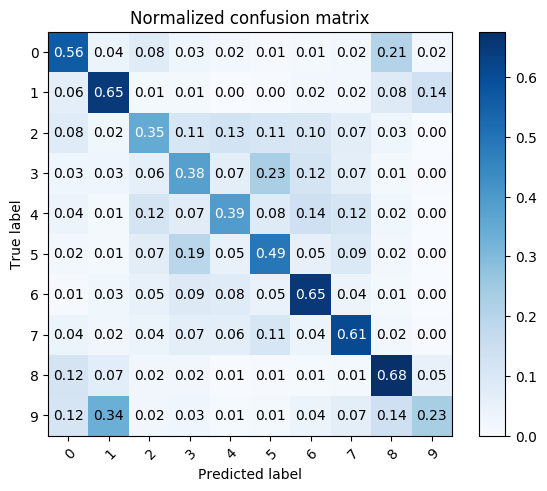

In [64]:
#Plot confusion matrix
y_test_Boost_argmax = np.argmax(y_test_boost, axis=1)
y_pred_Boost_argmax = np.argmax(final_prediction_matrix, axis=1)

plt.style.use('default')

plt.figure(figsize = (13,13))
plot_cm(y_test_Boost_argmax, y_pred_Boost_argmax, classes=np.array([0,1,2,3,4,5,6,7,8,9]), normalize=True,
                      title='Normalized confusion matrix')

In [73]:
final_prediction_store_2 = np.zeros_like(y_test_boost)
for i in range(len(model_store)):
    curr_predict = model_store[i].predict(x_test_boost)
    curr_predict_matrix = (curr_predict == curr_predict.max(axis=1)[:,None]).astype(int)
    final_prediction_store_2 += curr_predict_matrix
final_prediction_matrix_2 = (final_prediction_store_2 == final_prediction_store_2.max(axis=1)[:,None]).astype(int)
final_match_matrix_2 = y_test_boost - final_prediction_matrix_2
final_match_vector_2 = np.sum(np.abs(final_match_matrix_2), axis = 1)/2
final_accuracy_2 = (len(final_match_vector_2)-np.sum(final_match_vector_2))/len(final_match_vector_2)

In [74]:
print(final_accuracy_2)

0.38455


Normalized confusion matrix
[[0.407 0.037 0.163 0.039 0.03  0.011 0.01  0.002 0.252 0.049]
 [0.074 0.495 0.04  0.023 0.002 0.017 0.015 0.004 0.101 0.229]
 [0.051 0.016 0.552 0.114 0.055 0.085 0.06  0.031 0.033 0.003]
 [0.025 0.021 0.199 0.415 0.048 0.168 0.079 0.026 0.017 0.002]
 [0.025 0.009 0.397 0.1   0.23  0.064 0.115 0.04  0.018 0.002]
 [0.02  0.011 0.218 0.312 0.039 0.295 0.045 0.045 0.015 0.   ]
 [0.01  0.024 0.19  0.118 0.061 0.052 0.52  0.014 0.01  0.001]
 [0.03  0.023 0.206 0.113 0.092 0.128 0.03  0.352 0.018 0.008]
 [0.117 0.062 0.065 0.027 0.009 0.006 0.004 0.005 0.619 0.086]
 [0.096 0.286 0.069 0.04  0.014 0.016 0.027 0.029 0.146 0.277]]


<Figure size 1300x1300 with 0 Axes>

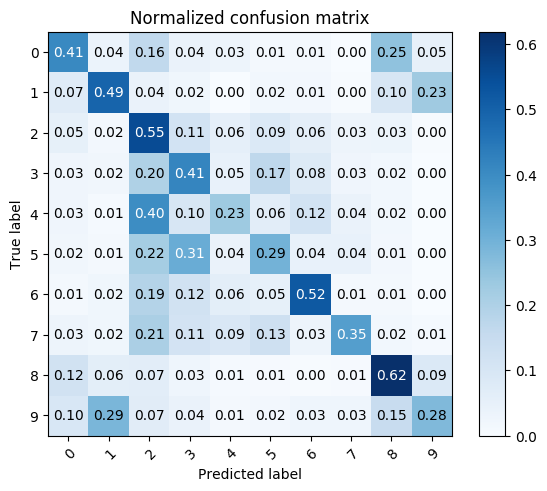

In [75]:
#Plot confusion matrix
y_test_Boost_argmax_2 = np.argmax(y_test_boost, axis=1)
y_pred_Boost_argmax_2 = np.argmax(final_prediction_matrix_2, axis=1)

plt.style.use('default')

plt.figure(figsize = (13,13))
plot_cm(y_test_Boost_argmax_2, y_pred_Boost_argmax_2, classes=np.array([0,1,2,3,4,5,6,7,8,9]), normalize=True,
                      title='Normalized confusion matrix')

(array([ 7., 18.,  8.,  5.,  6.,  2.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.13564491, 0.24833137, 0.36101782, 0.47370428, 0.58639074,
        0.69907719, 0.81176365, 0.92445011, 1.03713656, 1.14982302,
        1.26250948, 1.37519593, 1.48788239, 1.60056885, 1.7132553 ,
        1.82594176, 1.93862822, 2.05131467, 2.16400113, 2.27668759,
        2.38937404]),
 <a list of 20 Patch objects>)

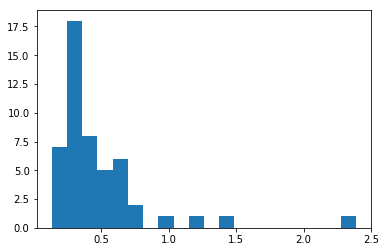

In [57]:
final_alpha_2 = np.load('./PureBoostData/Alpha/alpha49.npy')
plt.hist(final_alpha_2, bins = 20)

# Last thing

In [29]:
# example of a dcgan on cifar10
import numpy as np
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.cifar10 import load_data
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dropout
from matplotlib import pyplot
import keras
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [30]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize

In [31]:
def plot_cm(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(constrained_layout=True)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    return ax

In [32]:
# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 4x4 image
	n_nodes = 256 * 4 * 4
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((4, 4, 256)))
	# upsample to 8x8
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 16x16
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 32x32
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# output layer
	model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
	return model

In [33]:
def get_fake_objects(batch_size, G_input_n):
        z_noise = draw_G_random_input_noise(batch_size, G_input_n)
        G_of_z_fake_objects = final_generator.predict(z_noise)
        return z_noise, G_of_z_fake_objects

def draw_G_random_input_noise(num_samples, G_input_n):
        random_noise = np.random.uniform(-1.0, 1.0, size=[num_samples, G_input_n])
        # print("random_noise=", random_noise)
        return random_noise

In [34]:
from matplotlib import pyplot as plt

def plot_sub_objects(sample_images, file_name, full_path):
    """
    Plots image containing subplots 
    """
    try:
        figure_width = 10
        figure_height = 10
        plt.figure(figsize=(figure_width, figure_height))

        sample_size = sample_images.shape[0]
        num_items_subplot_x = 4
        num_items_subplot_y = 4

        for i in range(sample_size):
            subplot_index = i+1
            plt.subplot(num_items_subplot_x, num_items_subplot_y, subplot_index)
            image = sample_images[i, :, :, :]
            plt.imshow(image, cmap='gray')
            plt.axis('off')
        plt.savefig(full_path + '/' + file_name)
        plt.close('all')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(e)    
        
def plot_one_object(image, file_name, full_path):
    """
    Plots image containing subplots 
    """
    try:
        # plot
        figure_width = 10
        figure_height = 10    
        plt.figure(figsize=(figure_width, figure_height))
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.savefig(full_path + '/' + file_name)
        plt.close('all')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(e)    

In [35]:
G_input_n = 100
batch_size = 20
path_to_generator = './generator_model_3000.h5'

In [36]:
final_generator = define_generator(latent_dim = G_input_n)
final_generator.load_weights(path_to_generator)

In [37]:
#Define some parameters for training
batch_size = 256
num_classes = 10
epochs = 30
num_iterators = 50

In [38]:
#Load in the data (If you want undersampled dataset)
(_, _), (x_test, y_test) = load_data()

undersample_path = '../sampling/undersample/'
x_train = np.load(undersample_path + 'X9Prop0.1.npy')
x_train = x_train.astype('float32')
x_train /= 255
x_test = x_test.astype('float32')
x_test /= 255

y_train = np.load(undersample_path + 'Y9Prop0.1.npy')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [39]:
#Set up the model function
def model_func():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    # initiate RMSprop optimizer
    opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
    
    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
    return model

In [ ]:
model_store = []
history_store = []
alpha_store = []
weight_store = [np.array(x_train.shape[0]*[1/x_train.shape[0]])] #Initialize as 1/n for all

for i in range(num_iterators):
    #Generate examples from GAN:
    _, generated_images = get_fake_objects(4500, 100)
    curr_x = np.concatenate((x_train, generated_images))
    curr_y = np.concatenate((y_train, keras.utils.to_categorical([9]*4500, num_classes)))
    adjusted_weight = np.concatenate((weight_store[i], [np.mean(weight_store[i])] * 4500))
    adjusted_weight /= np.sum(adjusted_weight) #Normalize
    
    #Create current model, train it, store it and it's history.
    curr_model = model_func()
    curr_history = curr_model.fit(curr_x, curr_y, batch_size=batch_size, epochs=epochs, sample_weight=adjusted_weight, validation_data=(x_test, y_test), shuffle=True)
    model_store.append(curr_model)
    history_store.append(curr_history)
    
    #Recalculate the weights, update weights
    prediction = curr_model.predict(x_train) #predict
    predict_matrix = (prediction == prediction.max(axis=1)[:,None]).astype(int) #Convert to 1-0 matrix
    match_matrix = y_train - predict_matrix #Difference to eventually generate match_vector
    match_vector = np.sum(np.abs(match_matrix), axis = 1)/2 #1 indicates no match
    error = np.sum(weight_store[i] * match_vector)/np.sum(weight_store[i]) #Calculate error
    alpha = np.log((1-error)/error) + np.log(num_classes-1) #Calulate alpha
    alpha_store.append(alpha) #Append
    new_weight = weight_store[i] * np.exp(alpha * match_vector) #Calculate new weights
    new_weight /= np.sum(new_weight) #Normalize
    weight_store.append(new_weight) #Append
    
    if i%10==0:
        np.save('./GANBoostStore/Weights/new_weight_re' + str(i) + '.npy', new_weight)
        np.save('./GANBoostStore/Alpha/alpha_re' + str(i) + '.npy', alpha_store)
        curr_model.save_weights('./GANBoostStore/Model/model_re' + str(i) + '.h5')